In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u
import astropy.constants as c

In [3]:
plt.style.use('thomas')

In [4]:
# Rydberg constant for Positronium (Ps)
R_Ps = (c.m_e.si * c.e.si**4 / (16 * c.eps0.si**2 * c.h.si**3 * c.c.si))

In [5]:
R_Ps.si

<Quantity 5486865.78403629 1 / m>

In [6]:
# Recombination lines for Ps
def Ps_alpha_frequency(n1,n2):
    return (R_Ps.si * c.c * (1/n1**2 - 1/n2**2)).to(u.GHz)

In [7]:
# up to n = 151
n_max = 150

# lower level
n1 = np.arange(1,n_max+1,1)
# upper level (Ps alpha)
n2 = n1+1
# upper level (Ps beta)
n3 = n1+2

In [8]:
frequencies = Ps_alpha_frequency(n1,n2)
wavelengths = (c.c / frequencies).to(u.cm)
energies = (c.h * frequencies).to(u.erg)

In [9]:
for i in range(len(n1)):
    print('Ps{0}alpha: {1:15.5f}; {2:15.5f}; {3:15.5e}'.format(n1[i],frequencies[i],wavelengths[i],energies[i]))

Ps1alpha:   1233690.73508 GHz;         0.00002 cm;     8.17452e-12 erg
Ps2alpha:    228461.24724 GHz;         0.00013 cm;     1.51380e-12 erg
Ps3alpha:     79961.43653 GHz;         0.00037 cm;     5.29830e-13 erg
Ps4alpha:     37010.72205 GHz;         0.00081 cm;     2.45236e-13 erg
Ps5alpha:     20104.58976 GHz;         0.00149 cm;     1.33214e-13 erg
Ps6alpha:     12122.43353 GHz;         0.00247 cm;     8.03241e-14 erg
Ps7alpha:      7867.92561 GHz;         0.00381 cm;     5.21334e-14 erg
Ps8alpha:      5394.22389 GHz;         0.00556 cm;     3.57425e-14 erg
Ps9alpha:      3858.45662 GHz;         0.00777 cm;     2.55664e-14 erg
Ps10alpha:      2854.82154 GHz;         0.01050 cm;     1.89162e-14 erg
Ps11alpha:      2171.32590 GHz;         0.01381 cm;     1.43874e-14 erg
Ps12alpha:      1689.80212 GHz;         0.01774 cm;     1.11967e-14 erg
Ps13alpha:      1340.80626 GHz;         0.02236 cm;     8.88428e-15 erg
Ps14alpha:      1081.69407 GHz;         0.02772 cm;     7.16738e-15 erg
P

In [10]:
# Same for hydrogen
R_H = (c.m_e.si * c.e.si**4 / (8 * c.eps0.si**2 * c.h.si**3 * c.c.si)) * c.m_p / (c.m_p + c.m_e)

In [11]:
R_H.si

<Quantity 10967758.34019298 1 / m>

In [12]:
# slightly different, no idea why, might need to check which one to use in the end
c.Ryd

<<class 'astropy.constants.codata2018.CODATA2018'> name='Rydberg constant' value=10973731.56816 uncertainty=2.1e-05 unit='1 / m' reference='CODATA 2018'>

In [13]:
def H_alpha_frequency(n1,n2):
    return (R_H.si * c.c * (1/n1**2 - 1/n2**2)).to(u.GHz)

# see paper: https://ui.adsabs.harvard.edu/abs/2020MNRAS.499.3909Y/abstract in which H30alpha etc. are explained

In [14]:
frequencies_H = H_alpha_frequency(n1,n2)
wavelengths_H = (c.c / frequencies_H).to(u.cm)
energies_H = (c.h * frequencies_H).to(u.erg)

In [15]:
for i in range(len(n1)):
    print('H{0}alpha: {1:15.5f}; {2:15.5f}; {3:15.5e}'.format(n1[i],frequencies_H[i],wavelengths_H[i],energies_H[i]))

H1alpha:   2466038.42367 GHz;         0.00001 cm;     1.63401e-11 erg
H2alpha:    456673.78216 GHz;         0.00007 cm;     3.02595e-12 erg
H3alpha:    159835.82376 GHz;         0.00019 cm;     1.05908e-12 erg
H4alpha:     73981.15271 GHz;         0.00041 cm;     4.90204e-13 erg
H5alpha:     40187.29283 GHz;         0.00075 cm;     2.66284e-13 erg
H6alpha:     24231.67007 GHz;         0.00124 cm;     1.60561e-13 erg
H7alpha:     15727.28587 GHz;         0.00191 cm;     1.04210e-13 erg
H8alpha:     10782.57541 GHz;         0.00278 cm;     7.14461e-14 erg
H9alpha:      7712.71277 GHz;         0.00389 cm;     5.11050e-14 erg
H10alpha:      5706.53520 GHz;         0.00525 cm;     3.78119e-14 erg
H11alpha:      4340.28801 GHz;         0.00691 cm;     2.87591e-14 erg
H12alpha:      3377.76466 GHz;         0.00888 cm;     2.23813e-14 erg
H13alpha:      2680.15286 GHz;         0.01119 cm;     1.77589e-14 erg
H14alpha:      2162.21056 GHz;         0.01387 cm;     1.43270e-14 erg
H15alpha:      

In [16]:
# from email with Jonas
bands_effelsberg_min = np.array([5.3, 7.3, 13.0, 16.0, 18.0, 20.4, 35.0, 38.0]) * u.GHz
bands_effelsberg_max = np.array([7.3, 9.3, 15.0, 18.0, 20.0, 22.4, 37.0, 40.0]) * u.GHz

Text(0.5, 0, 'Frequency [GHz]')

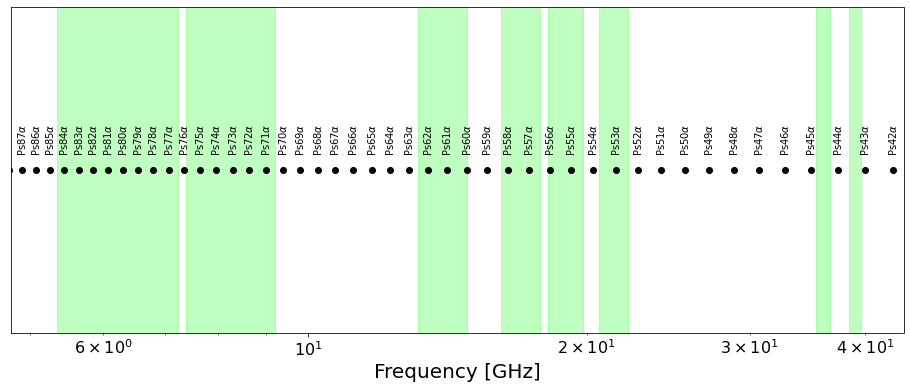

In [17]:
plt.figure(figsize=(16,6))

plt.plot(frequencies,np.repeat(1,n_max),'o')

for i in range(len(frequencies)):
    if (frequencies[i].value >= bands_effelsberg_min.value[0]*0.9) & \
       (frequencies[i].value <= bands_effelsberg_max.value[-1]*1.1):
        plt.text(frequencies[i].value,1.0025,r"Ps{0}$\alpha$".format(n1[i]),
                 rotation=90,horizontalalignment='center')

for i in range(len(bands_effelsberg_max.value)):
    plt.fill([bands_effelsberg_min.value[i]*1.01,
              bands_effelsberg_min.value[i]*1.01,
              bands_effelsberg_max.value[i]*0.99,
              bands_effelsberg_max.value[i]*0.99,
              bands_effelsberg_min.value[i]*1.01],
             [0,2,2,0,0],color='lime',alpha=0.25)

plt.xscale('log')

plt.ylim(0.975,1.025)

#plt.xlim(5,10)

plt.yticks([])

plt.xlim(bands_effelsberg_min.value[0]*0.9,bands_effelsberg_max.value[-1]*1.1)

plt.xlabel('Frequency [GHz]',fontsize=20)

In [18]:
# cross matching the lines with the Effelsberg bands

good_Psalphas = []

for i in range(len(frequencies)):
    for j in range(len(bands_effelsberg_max.value)):
        if (frequencies[i].value >= bands_effelsberg_min.value[j]) & \
           (frequencies[i].value <= bands_effelsberg_max.value[j]):
            #print(i,j)
            print("Ps{0}alpha @ {1:2.2f} GHz".format(n1[i],frequencies[i].value))
            good_Psalphas.append(i)

Ps43alpha @ 39.98 GHz
Ps53alpha @ 21.49 GHz
Ps55alpha @ 19.25 GHz
Ps56alpha @ 18.24 GHz
Ps57alpha @ 17.31 GHz
Ps58alpha @ 16.44 GHz
Ps60alpha @ 14.86 GHz
Ps61alpha @ 14.15 GHz
Ps62alpha @ 13.48 GHz
Ps71alpha @ 9.00 GHz
Ps72alpha @ 8.63 GHz
Ps73alpha @ 8.29 GHz
Ps74alpha @ 7.96 GHz
Ps75alpha @ 7.64 GHz
Ps76alpha @ 7.35 GHz
Ps77alpha @ 7.07 GHz
Ps78alpha @ 6.80 GHz
Ps79alpha @ 6.55 GHz
Ps80alpha @ 6.31 GHz
Ps81alpha @ 6.08 GHz
Ps82alpha @ 5.86 GHz
Ps83alpha @ 5.65 GHz
Ps84alpha @ 5.45 GHz


In [19]:
# how many in total in all bands:
len(good_Psalphas)

23

In [20]:
42 in good_Psalphas

True

In [21]:
bands_effelsberg_min

<Quantity [ 5.3,  7.3, 13. , 16. , 18. , 20.4, 35. , 38. ] GHz>

In [22]:
bands_effelsberg_max

<Quantity [ 7.3,  9.3, 15. , 18. , 20. , 22.4, 37. , 40. ] GHz>

In [23]:
# disturbing Halpha lines:

# cross matching the Halpha lines with the Effelsberg bands

bad_Halphas = []

for i in range(len(frequencies)):
    for j in range(len(bands_effelsberg_max.value)):
        if (frequencies_H[i].value >= bands_effelsberg_min.value[j]) & \
           (frequencies_H[i].value <= bands_effelsberg_max.value[j]):
            #print(i,j)
            print("H{0}alpha @ {1:2.2f} GHz".format(n1[i],frequencies_H[i].value))
            bad_Halphas.append(i)

H55alpha @ 38.47 GHz
H56alpha @ 36.47 GHz
H66alpha @ 22.36 GHz
H67alpha @ 21.38 GHz
H68alpha @ 20.46 GHz
H69alpha @ 19.59 GHz
H70alpha @ 18.77 GHz
H71alpha @ 17.99 GHz
H72alpha @ 17.26 GHz
H73alpha @ 16.56 GHz
H76alpha @ 14.69 GHz
H77alpha @ 14.13 GHz
H78alpha @ 13.60 GHz
H79alpha @ 13.09 GHz
H89alpha @ 9.17 GHz
H90alpha @ 8.87 GHz
H91alpha @ 8.58 GHz
H92alpha @ 8.31 GHz
H93alpha @ 8.05 GHz
H94alpha @ 7.79 GHz
H95alpha @ 7.55 GHz
H96alpha @ 7.32 GHz
H97alpha @ 7.10 GHz
H98alpha @ 6.88 GHz
H99alpha @ 6.68 GHz
H100alpha @ 6.48 GHz
H101alpha @ 6.29 GHz
H102alpha @ 6.11 GHz
H103alpha @ 5.93 GHz
H104alpha @ 5.76 GHz
H105alpha @ 5.60 GHz
H106alpha @ 5.44 GHz


In [24]:
len(bad_Halphas)

32

In [25]:
effelsberg_labels = np.unique(np.concatenate([bands_effelsberg_min.value,bands_effelsberg_max.value]))

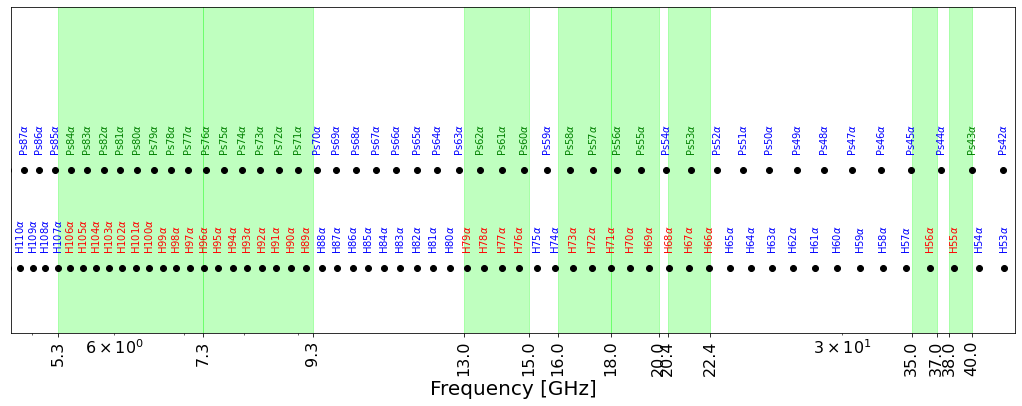

In [26]:
plt.figure(figsize=(18,6))

plt.plot(frequencies,np.repeat(1,n_max),'ko')

for i in range(len(frequencies)):
    if (frequencies[i].value >= bands_effelsberg_min.value[0]*0.9) & \
       (frequencies[i].value <= bands_effelsberg_max.value[-1]*1.1):
        if i in good_Psalphas: 
            plt.text(frequencies[i].value,1.0025,r"Ps{0}$\alpha$".format(n1[i]),
                     rotation=90,horizontalalignment='center',color='green')
        else:
            plt.text(frequencies[i].value,1.0025,r"Ps{0}$\alpha$".format(n1[i]),
                     rotation=90,horizontalalignment='center',color='blue')
            
            
plt.plot(frequencies_H,np.repeat(0.985,n_max),'ko')            

for i in range(len(frequencies_H)):
    if (frequencies_H[i].value >= bands_effelsberg_min.value[0]*0.9) & \
       (frequencies_H[i].value <= bands_effelsberg_max.value[-1]*1.1):
        if i in bad_Halphas: 
            plt.text(frequencies_H[i].value,0.9875,r"H{0}$\alpha$".format(n1[i]),
                     rotation=90,horizontalalignment='center',color='red')
        else:
            plt.text(frequencies_H[i].value,0.9875,r"H{0}$\alpha$".format(n1[i]),
                     rotation=90,horizontalalignment='center',color='blue')


for i in range(len(bands_effelsberg_max.value)):
    plt.fill([bands_effelsberg_min.value[i],
              bands_effelsberg_min.value[i],
              bands_effelsberg_max.value[i],
              bands_effelsberg_max.value[i],
              bands_effelsberg_min.value[i]],
             [0,2,2,0,0],color='lime',alpha=0.25)

plt.xscale('log')

plt.xticks(labels=effelsberg_labels,ticks=effelsberg_labels,rotation=90)

plt.ylim(0.975,1.025)

#plt.xlim(5,10)

plt.yticks([])

plt.xlim(bands_effelsberg_min.value[0]*0.9,bands_effelsberg_max.value[-1]*1.1)

plt.xlabel('Frequency [GHz]',fontsize=20)

plt.savefig('Psalpha_search_Effelsberg.pdf',bbox_inches='tight')

In [27]:
# Getting estimates on line fluxes
# Taken from Wallyn 1996: https://articles.adsabs.harvard.edu/pdf/1996ApJ...465..473W

In [28]:
# values copied from Table 6
n_IPs = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,32,87,89,129,133.])

In [29]:
# using temperatures of 1e3, 1e4, 1e5, 1e6 Kelvin for interpolation

I_Ps_1e3 = np.array([2.27e-12,1.25e-12,6.69e-13,3.89e-13,2.37e-13,1.50e-13,
                     9.89e-14,6.74e-14,4.76e-14,3.38e-14,2.57e-14,2.11e-14,
                     1.7e-14,1.4e-14,1.3e-14,1.1e-14,9.5e-15,8.2e-15,2e-15,
                     2e-16,2e-16,7e-17,7e-17]) / u.cm**3 / u.s

In [30]:
I_Ps_1e4 = np.array([3.18e-13,1.33e-13,5.09e-14,2.37e-14,1.23e-14,6.84e-15,
                     2.93e-15,2.51e-15,1.62e-15,1.03e-15,7.55e-16,5.47e-16,
                     4.1e-16,3.1e-16,2.4e-16,1.9e-16,1.5e-16,1.2e-16,1e-17,
                     3e-19,2e-19,5e-20,5e-20]) / u.cm**3 / u.s

In [31]:
I_Ps_1e5 = np.array([2.54e-14,9.30e-15,2.31e-15,8.07e-16,3.36e-16,1.57e-16,
                     8.04e-17,4.40e-17,2.55e-17,1.56e-17,9.89e-18,6.51e-18,
                     4.4e-18,3.1e-18,2.2e-18,1.6e-18,1.2e-18,9.0e-19,5e-20,
                     3e-22,3e-22,4e-23,3e-23]) / u.cm**3 / u.s

In [32]:
I_Ps_1e6 = np.array([1.11e-15,4.95e-16,8.97e-17,2.52e-17,9.15e-18,3.96e-18,
                     1.93e-18,1.03e-18,5.92e-19,3.60e-19,2.29e-19,1.51e-19,
                     1.0e-19,7.2e-20,5.2e-20,3.8e-20,2.8e-20,2.1e-20,1e-21,
                     8e-24,7e-24,1e-24,9e-25]) / u.cm**3 / u.s

In [33]:
T_arr = np.array([1e3,1e4,1e5,1e6]) * u.K

Text(0, 0.5, 'Intensity [$\\mathrm{cm^{-3}\\,s^{-1}}$]')

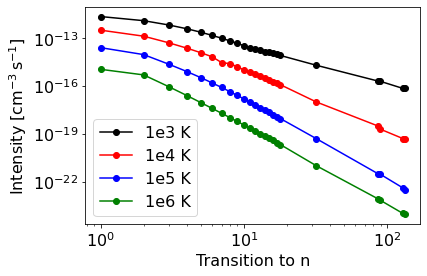

In [34]:
plt.loglog(n_IPs,I_Ps_1e3,'o-',label='1e3 K')
plt.loglog(n_IPs,I_Ps_1e4,'o-',label='1e4 K')
plt.loglog(n_IPs,I_Ps_1e5,'o-',label='1e5 K')
plt.loglog(n_IPs,I_Ps_1e6,'o-',label='1e6 K')
plt.legend()
plt.xlabel('Transition to n')
plt.ylabel(r'Intensity [$\mathrm{cm^{-3}\,s^{-1}}$]')
# see Figure 9 of Wallyn+1996

In [35]:
# Estimating the line strength:

# Equation (5.1) in Wallyn+1996 or Equations (1-3) in Ellis+2009
# https://iopscience.iop.org/article/10.1088/0004-637X/707/1/457/pdf:

def Ps_alpha_radiative_recombination_line_flux(r,
                                               f_Ps,
                                               alpha,
                                               beta,
                                               distance,
                                               A_lambda,
                                               Delta_lambda,
                                               nu_line):
    
    # r is the number of positrons produced in a source per second [1/s]
    # f_Ps is the Positronium fraction that depends on the gas conditions [1]
    # (temperature and ionisation state, see below); maximum is 1.0, minimum 0.0;
    # alpha is the number of emitted Ps Lyalpha photons for each Ps atom (see below) [1]
    # beta is the ratio of the intensity of Ps Lyalpha to the line in question [1]
    # distance is the distance to the source [cm]
    # A_lambda describes an absorption coefficient [1]
    # Delta_Lambda is the line width in microns
    # nu_line is the frequency of the line [GHz]
    
    # f_lambda is the Ps alpha recombination line photon flux
    f_lambda = r * f_Ps * 3/4 * alpha/beta * 1/(4 * np.pi * distance**2) * 1/2.512**A_lambda * 1/Delta_lambda
    f_lambda = f_lambda.to(1/u.m**2/u.s/u.micron)
    
    return f_lambda
    
    # to get the energy flux in Jansky, we go from wavelength to Hertz and multiply by the energy of the line
    

In [36]:
def Ps_alpha_line_width(nu_line,temperature):
    
    lambda_line = (c.c/nu_line).to(u.micron)
    
    Delta_lambda = lambda_line * 7.8e-4 * (temperature / (1e4*u.K))**0.44
    
    return Delta_lambda

In [37]:
n1[80],frequencies[80],wavelengths[80].to(u.micron)

(81, <Quantity 6.07763902 GHz>, <Quantity 49327.1247259 micron>)

In [38]:
line_width_Ps80alpha = Ps_alpha_line_width(frequencies[80],8e3*u.K)
line_width_Ps80alpha

<Quantity 34.87707042 micron>

In [39]:
line_flux_Ps80alpha = Ps_alpha_radiative_recombination_line_flux(r=1e43/u.s,
                                           f_Ps=1.0,
                                           alpha=0.4,
                                           beta=2.192,
                                           distance=1*u.kpc,
                                           A_lambda=10, # no idea about extinction at 6 GHz???
                                           Delta_lambda=line_width_Ps80alpha,
                                           nu_line=frequencies[80])

In [40]:
line_flux_Ps80alpha

<Quantity 0.00032782 1 / (m2 micron s)>

In [41]:
"""
dN/(dlambda * dt * dA)

nu = c / lambda

dnu / dlambda = -c / lambda**2

dlambda = dnu * lambda**2 / c

dN/(lambda**2 * dnu * dt * dA) * c = 
dN / (dnu * dt * dA) * (c / lambda**2)"""

'\ndN/(dlambda * dt * dA)\n\nnu = c / lambda\n\ndnu / dlambda = -c / lambda**2\n\ndlambda = dnu * lambda**2 / c\n\ndN/(lambda**2 * dnu * dt * dA) * c = \ndN / (dnu * dt * dA) * (c / lambda**2)'

In [42]:
(line_flux_Ps80alpha * wavelengths[80]**2 / c.c).to(1/u.cm**2/u.s/u.Hz)

<Quantity 2.66062888e-13 1 / (cm2 Hz s)>

In [43]:
(line_flux_Ps80alpha * wavelengths[80]**2 / c.c * energies[80]).to(u.Jy)

<Quantity 1.0714582e-06 Jy>

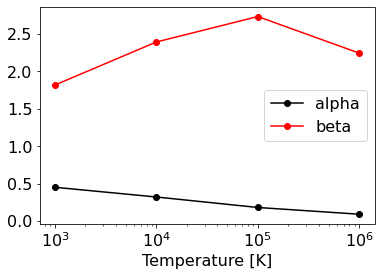

In [44]:
# functions for alpha and beta
alpha_arr = np.array([0.45,0.32,0.18,0.09])
beta_arr = np.array([1.816,2.391,2.731,2.242])

plt.plot(T_arr,alpha_arr,'o-',label='alpha')
plt.plot(T_arr,beta_arr,'o-',label='beta')

plt.xscale('log')

plt.xlabel('Temperature [K]')

plt.legend()

In [45]:
from scipy.interpolate import interp1d as interpol

In [46]:
alpha_func = interpol(T_arr.value,alpha_arr)
beta_func = interpol(T_arr.value,beta_arr)

In [47]:
alpha_func(8e3)

array(0.34888889)

In [48]:
Temp = np.geomspace(1e3,1e6,100)*u.K

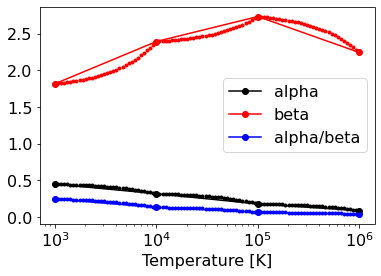

In [49]:
# functions for alpha and beta
alpha_arr = np.array([0.45,0.32,0.18,0.09])
beta_arr = np.array([1.816,2.391,2.731,2.242])

plt.plot(T_arr,alpha_arr,'ko-',label='alpha')
plt.plot(T_arr,beta_arr,'ro-',label='beta')
plt.plot(T_arr,alpha_arr/beta_arr,'bo-',label='alpha/beta')

plt.plot(Temp,alpha_func(Temp.value),'k.')
plt.plot(Temp,beta_func(Temp.value),'r.')
plt.plot(Temp,alpha_func(Temp.value)/beta_func(Temp.value),'b.')

plt.xscale('log')

plt.xlabel('Temperature [K]')

plt.legend()

In [50]:
# need better interpolations here and maybe extrapolations using Wallyn paper
# for now I use this

In [51]:
# Estimating the line strength:

# Equation (5.1) in Wallyn+1996 or Equations (1-3) in Ellis+2009
# https://iopscience.iop.org/article/10.1088/0004-637X/707/1/457/pdf:

# redefinition of the function
def Ps_alpha_radiative_recombination_line_flux_new(r,
                                               f_Ps,
                                               temperature,
                                               distance,
                                               A_lambda,
                                               Delta_lambda,
                                               nu_line):
    
    # r is the number of positrons produced in a source per second [1/s]
    # f_Ps is the Positronium fraction that depends on the gas conditions [1]
    # (temperature and ionisation state, see below); maximum is 1.0, minimum 0.0;
    # temperature of the medium [K]
    # distance is the distance to the source [cm]
    # A_lambda describes an absorption coefficient [1]
    # Delta_Lambda is the line width in microns
    # nu_line is the frequency of the line [GHz]
    
    # f_lambda is the Ps alpha recombination line photon flux
    alpha = alpha_func(temperature.value)
    beta = beta_func(temperature.value)
    
    f_lambda = r * f_Ps * 3/4 * alpha/beta * 1/(4 * np.pi * distance**2) * 1/2.512**A_lambda * 1/Delta_lambda
    f_lambda = f_lambda.to(1/u.m**2/u.s/u.micron)
    
    lambda_line = c.c/nu_line
    energy_line = c.h * nu_line
    
    f_erg = (f_lambda * lambda_line**2 / c.c * energy_line).to(u.Jy)
    
    return f_erg

In [52]:
Ps_alpha_radiative_recombination_line_flux_new(r = 1e43 / u.s,
                                               f_Ps = 1.0,
                                               temperature = 8e3 * u.K,
                                               distance = 8 * u.kpc,
                                               A_lambda = 10.0, # no idea about extinction at 6 GHz???
                                               Delta_lambda = Ps_alpha_line_width(frequencies[80],8e3 * u.K),
                                               nu_line = frequencies[80])

<Quantity 1.41428116e-08 Jy>

In [53]:
# this example would assume that all the positrons that are created in the Milky Way
# per second are in one place at a distanc of 8 kpc
# the Ps80alpha line would then be 141 microJansky strong at A_lamba = 0, but only 14 nanoJansky at A_lambda = 10
#
# no idea about absorption ... 
#
# the temperature is what we get from gamma-ray observations

In [54]:
# need to calculate the expected Hnalpha spectra (Wallyn gives ratios)
# Here is what the spectrum in the Effelsberg band from 5.3 to 7.3 GHz would look like:

In [55]:
n_min = 76
n_max = 83
frequencies[[n_max,n_min]]

n_lines = n_max-n_min

N_nu = 5001
nu_arr = np.linspace(5.3,7.3,N_nu) * u.GHz

temperature = 10e3 * u.K
distance = 8 * u.kpc
A_lambda = 10.0 #??????
f_Ps = 0.97
r = 1e43 / u.s

spec = np.zeros(N_nu) * u.Jy / u.GHz

def Gaussian(x,F,mu,sigma):
    return F/(np.sqrt(2*np.pi)*sigma) * np.exp(-0.5*((x-mu)/sigma)**2)

for i in range(n_min,n_max+1,1):
    tmp_freq = frequencies[i]
    tmp_wave = c.c / tmp_freq
    sigma_wave = Ps_alpha_line_width(tmp_freq,temperature)
    sigma_freq = (sigma_wave * c.c / tmp_wave**2).to(u.GHz)
    tmp_flux = Ps_alpha_radiative_recombination_line_flux_new(r,
                                                              f_Ps,
                                                              temperature,
                                                              distance,
                                                              A_lambda,
                                                              sigma_wave,
                                                              tmp_freq)
    
    print(i,tmp_freq,sigma_freq,tmp_flux)
    
    spec += Gaussian(nu_arr,tmp_flux,tmp_freq,sigma_freq)
    

76 7.068155285645959 GHz 0.005513161122803847 GHz 1.0796364723633548e-08 Jy
77 6.801446782318217 GHz 0.005305128490208209 GHz 1.0796364723633548e-08 Jy
78 6.5479900015487535 GHz 0.005107432201208028 GHz 1.079636472363355e-08 Jy
79 6.306972017367924 GHz 0.004919438173546981 GHz 1.0796364723633548e-08 Jy
80 6.077639020435017 GHz 0.004740558435939313 GHz 1.079636472363355e-08 Jy
81 5.859291362648265 GHz 0.004570247262865647 GHz 1.079636472363355e-08 Jy
82 5.651279070851861 GHz 0.004407997675264451 GHz 1.079636472363355e-08 Jy
83 5.452997780268659 GHz 0.0042533382686095545 GHz 1.079636472363355e-08 Jy


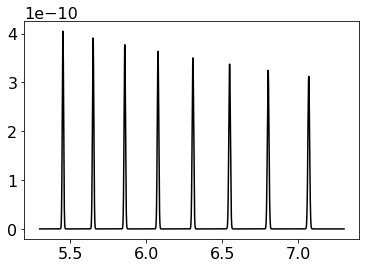

In [56]:
plt.plot(nu_arr,spec*np.diff(nu_arr)[0])

In [57]:
(r/(4*np.pi*distance**2)).to(1/u.cm**2/u.s)

<Quantity 0.0013059 1 / (cm2 s)>